
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/jenglick/QuantumTutorials/blob/master/ProgramQuantumComputer.ipynb)



In [40]:
!pip install qiskit-aqua==0.4.0
!git clone https://github.com/jenglick/QuantumTutorials.git
%cd QuantumTutorials
%load think.py
from think import *

<img src="figs/hello1.png" width="1900 px" align="center">


<img src="figs/qiskit-panels.png" width="1100 px" align="center">


<img src="figs/aqua.png" width="1500 px" align="center">

<img src="figs/satellite-teleport.png" width="1500 px" align="center">

# The quantum teleportation protocol was invented in 1993.

<br>

<img src="figs/prl70.png" width="1100 px" align="center">

https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.70.1895 

<img src="figs/about-teleport.png" width="1500 px" align="center">

- Photons: http://www.nature.com/nature/journal/v390/n6660/abs/390575a0.html

- Atoms: http://www.nature.com/nphys/journal/v9/n7/abs/nphys2631.html
- Ions: http://www.nature.com/nature/journal/v429/n6993/full/nature02570.html, http://www.nature.com/nature/journal/v429/n6993/full/nature02608.html
- Electrons: http://science.sciencemag.org/content/345/6196/532
- Superconducting circuits: http://www.nature.com/nature/journal/v500/n7462/full/nature12422.html 

- The 2017 distance record: https://www.nature.com/articles/nature23675

# Alice can teleport a quantum state to Bob using <br>shared entanglement and classical communication.

<br>
<br>
<br>
<br>

<img src="figs/alice-bob.png" width="1200 px" align="center">


# Let's prepare Alice's qubit using Qiskit.

<img src="figs/bloch.png" width="1300 px" align="center">

## Alice wants to prepare this quantum state: $|\psi\rangle_Q = \alpha |0\rangle_Q + \beta |1\rangle_Q$

- Rotate qubit $Q$ initialized to $|0\rangle$ around the $y$ axis by an angle $\theta = \pi/4$:  $R_y(\theta)|0\rangle_Q = |\psi\rangle_Q$

- In this way, the probability of observing '0' upon measurement is $|\alpha|^2 = |\cos(\frac{\pi}{8})|^2 \approx 0.854$, and of '1' is $|\beta|^2 = |\sin(\frac{\pi}{8})|^2 \approx 0.146$.

- Here is how we can do this in [Qiskit](https://qiskit.org):

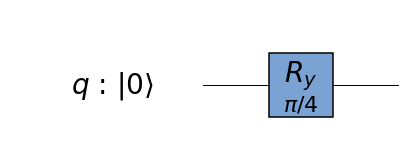

In [41]:
q = QuantumRegister(1, 'q')       # create a quantum register for Alice's qubit

superposition = QuantumCircuit(q) # create a quantum circuit
superposition.ry(np.pi/4, q)      # apply an rotation gate R_y to Alice's qubit

superposition.draw(output='mpl', style=style) # visualize the circuit

# We can check this state by measuring and estimating $|\alpha|^2$ and $|\beta|^2$.

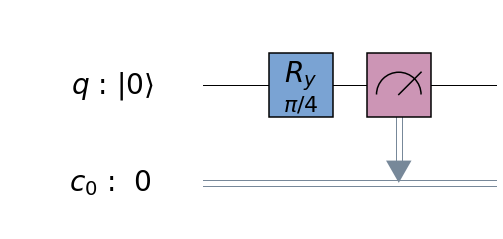

In [42]:
c = ClassicalRegister(1, 'c')  # create a classical register to store the measurement outcome

superposition.add_register(c)  # add the classical register to the circuit
superposition.measure(q, c)    # measure Alice's qubit and store the outcome in the classical register
superposition.draw(output='mpl', style=style)  # visualize the circuit

# Let's run this quantum circuit and plot the measurement outcomes.

Alice's measurement counts = {'0': 874, '1': 150}


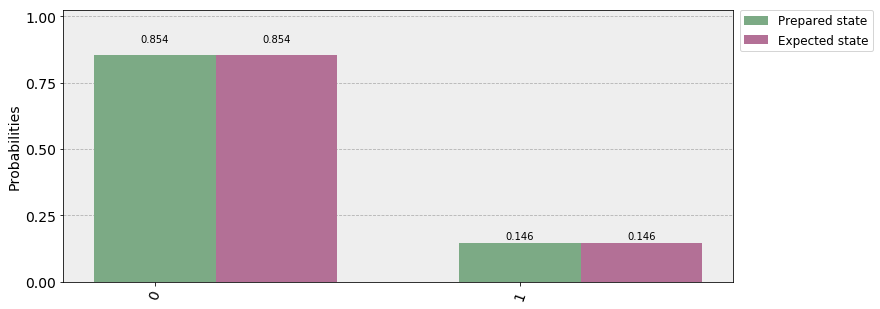

In [44]:
backend = BasicAer.get_backend('qasm_simulator')   # specify the backend for running the circuit
job = execute(superposition, backend, shots=1024)  # run the circuit

result = job.result()
counts = result.get_counts() # extract the measurement counts
print("Alice's measurement counts = {}".format(counts))
plot_histogram([counts, alice], color=['#7caa85', '#b37096'], figsize=(12, 5), legend=['Prepared state','Expected state'])

# Alice and Bob share two qubits $A$ and $B$, entangled in a Bell state: <br><br>$|\Psi\rangle_{AB} = \frac{|0\rangle_A |0\rangle_B + |1\rangle_A |1\rangle_B}{\sqrt{2}}$

<img src="figs/alice-bob.png" width="600 px" align="center">

## We can create this state using two basic quantum gates: Hadamard & $CNOT$:

<img src="figs/bell.png" width="775 px" align="center">


# Let's create this Bell state using Qiskit.

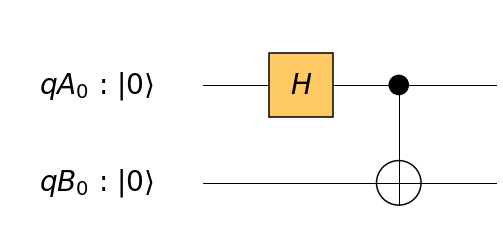

In [45]:
qA = QuantumRegister(1, 'qA')
qB = QuantumRegister(1, 'qB')

entanglement = QuantumCircuit(qA, qB)
entanglement.h(qA)       # apply Hadamard gate
entanglement.cx(qA, qB)  # apply controlled-NOT gate

entanglement.draw(output='mpl', style=style)

# We can test the properties of this entangled state by measuring<br> just one of the qubits.

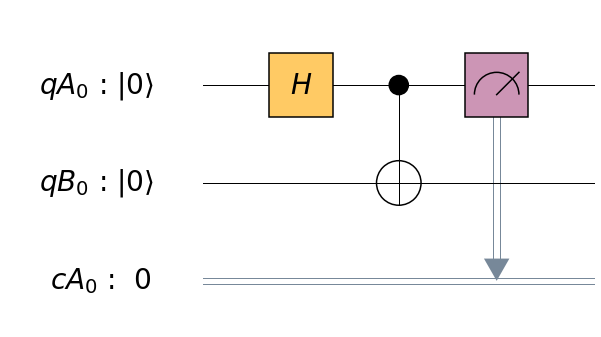

In [46]:
cA = ClassicalRegister(1, 'cA')

entanglement.add_register(cA)
entanglement.measure(qA, cA)

entanglement.draw(output='mpl', style=style)

# Here, we execute the circuit and visualize the results.

Measurement counts for qubit A in the Bell state = {'1': 508, '0': 516}


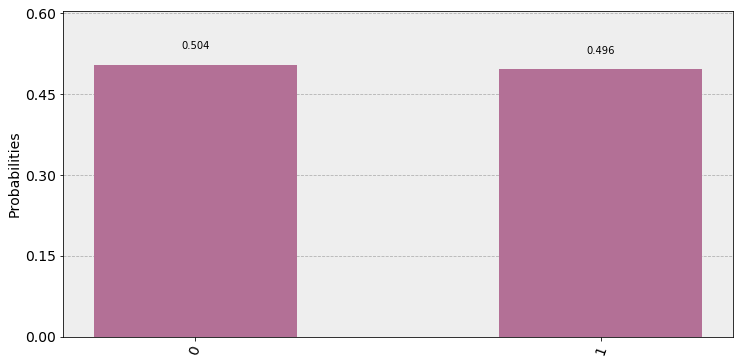

In [47]:
job = execute(entanglement, backend, shots=1024) 

result = job.result()
counts = result.get_counts()
print("Measurement counts for qubit A in the Bell state = {}".format(counts))
plot_histogram(counts, color='#b37096', figsize=(12, 6))

# When we look at only one of the qubits, the outcomes <br>are completely random.

# Let's see what happens if we measure both qubits.

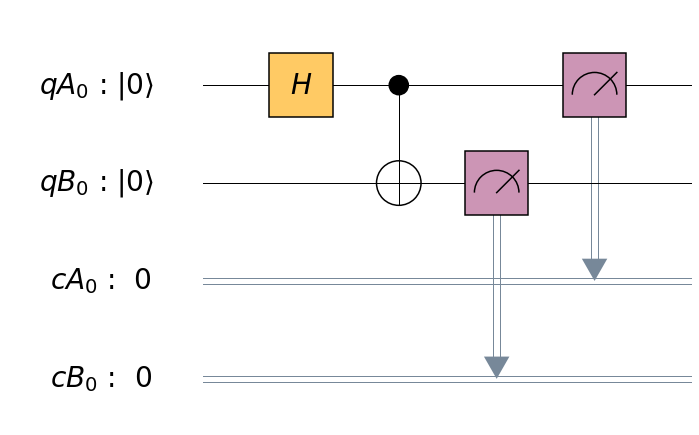

In [48]:
cB = ClassicalRegister(1, 'cB')

entanglement.add_register(cB)
entanglement.measure(qB, cB)

entanglement.draw(output = 'mpl', style=style)

# Here are the measurement results for both qubits:

Bell state measurement counts = {'0 0': 479, '1 1': 545}


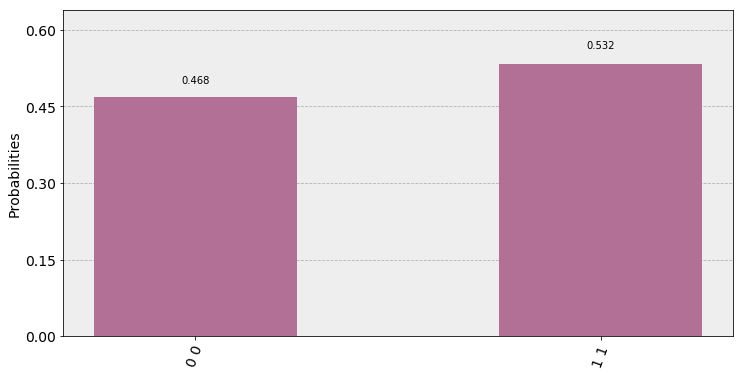

In [49]:
job = execute(entanglement, backend, shots=1024) 

result = job.result()
counts = result.get_counts()
print("Bell state measurement counts = {}".format(counts))
plot_histogram(counts, color='#b37096', figsize=(12, 6))

<img src="figs/entanglement-meaning.png" width="1500 px" align="center">

# So far, we have looked at the first stage of quantum teleportation:

<br>

- Alice has a quantum state that she wants to transmit to Bob: $|\psi\rangle_Q = \alpha|0\rangle_Q + \beta|1\rangle_Q$ 

<br>

- Alice shares an entangled state with Bob: $|\Psi\rangle_{AB} = \frac{1}{\sqrt{2}}(|0\rangle_A \otimes |0\rangle_B + |1\rangle_A \otimes |1\rangle_B)$


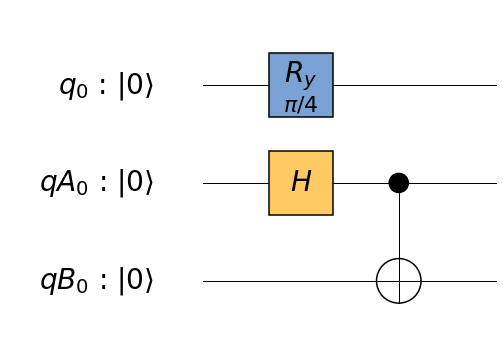

In [51]:
teleportation = QuantumCircuit(q, qA, qB)

teleportation.ry(np.pi/4, q)

teleportation.h(qA)
teleportation.cx(qA, qB)

teleportation.draw(output='mpl', style=style)

# In the next step, Alice makes a Bell measurement of her qubits.

<img src="figs/alice-bob.png" width="500 px" align="center">
<img src="figs/teleportation_circuit.png" width="1200 px" align="center">

# Some observations before Alice makes her Bell measurement:

This is the state of all three qubits:

<br>

$$|\psi\rangle_Q \otimes |\Psi\rangle_{AB} = \big(\alpha|0\rangle_Q + \beta|1\rangle_Q \big) ~\otimes~ \frac{|0\rangle_A |0\rangle_B + |1\rangle_A |1\rangle_B}{\sqrt{2}} $$

<br>

Let's see what this looks like if we express Alice's qubits $Q$ and $A$ in a new basis, called the **Bell basis**:
 

\begin{equation}
\begin{split}
    & |\Phi^+\rangle = \frac{|00\rangle + |11\rangle}{\sqrt 2}, ~~~~~~ |\Phi^-\rangle = \frac{|00\rangle - |11\rangle}{\sqrt 2} \\
    & |\Psi^+\rangle = \frac{|01\rangle + |10\rangle}{\sqrt 2}, ~~~~~~ |\Psi^-\rangle = \frac{|01\rangle - |10\rangle}{\sqrt 2}
\end{split}
\end{equation}

All we have done is moved some terms around and renamed them. In the Bell basis, the full state is

<br>

\begin{equation}
\begin{split}
|\psi\rangle_Q \otimes |\Psi\rangle_{AB}  = & \frac{1}{2} \bigg[~
|\Phi^+\rangle_{QA} \otimes \Big(\alpha|0\rangle_B + \beta|1\rangle_B\Big) + 
|\Phi^-\rangle_{QA} \otimes \Big(\alpha|0\rangle_B - \beta|1\rangle_B\Big) \\
& ~ ~ + |\Psi^+\rangle_{QA} \otimes \Big(\beta|0\rangle_B + \alpha|1\rangle_B\Big) + 
|\Psi^-\rangle_{QA} \otimes \Big(\!-\beta|0\rangle_B + \alpha|1\rangle_B\Big) \bigg]
\end{split}
\end{equation}

<br>

## Suppose Alice were to measure her qubits $Q$ and $A$ in the "Bell basis". <br>She would observe one of the four Bell states with equal probability, <br><br>and Bob's qubit $B$ would look suspiciously similar Alice's qubit $Q$...

# Let's say Alice measured and observed the state $|\Phi^-\rangle_{QA}$. 

<br><br>

- The full state before Alice's measurement:

\begin{equation}
\begin{split}
|\psi\rangle_Q \otimes |\Psi\rangle_{AB}  = & \frac{1}{2} \bigg[~
|\Phi^+\rangle_{QA} \otimes \Big(\alpha|0\rangle_B + \beta|1\rangle_B\Big) + 
|\Phi^-\rangle_{QA} \otimes \Big(\alpha|0\rangle_B - \beta|1\rangle_B\Big) \\
& ~ ~ + |\Psi^+\rangle_{QA} \otimes \Big(\beta|0\rangle_B + \alpha|1\rangle_B\Big) + 
|\Psi^-\rangle_{QA} \otimes \Big(\!-\beta|0\rangle_B + \alpha|1\rangle_B\Big) \bigg]
\end{split}
\end{equation}

<br><br>

- After measurement, the state of Bob's qubit would be $\alpha|0\rangle_B - \beta|1\rangle_B$. 

<br>

- If Alice told Bob this result, he could apply $Z = \begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix}$ to get rid of the minus sign.

<br>

- Then, his qubit $B$ would be the same as the initial state of Alice's qubit $|\psi\rangle_Q = \alpha|0\rangle_Q + \beta|1\rangle_Q$.

## Here are the four possible results of Alice's measurement and the transformations Bob performs in order to complete the teleportation protocol:

<img src="figs/teleportation_circuit.png" width="825 px" align="center">

\begin{equation} 00: |\Phi^+\rangle_{QA} ~\longrightarrow ~~~(\alpha|0\rangle_B + \beta|1\rangle_B) \longrightarrow \textrm{ Bob applies } I = \begin{pmatrix} 1 & 0 \\ 0 & 1 \end{pmatrix}\end{equation}

\begin{equation} 10: |\Phi^-\rangle_{QA} ~\longrightarrow ~~~(\alpha|0\rangle_B - \beta|1\rangle_B)  \longrightarrow \textrm{ Bob applies } Z = \begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix}\end{equation}

\begin{equation} 01: |\Psi^+\rangle_{QA} ~\longrightarrow ~~~(\beta|0\rangle_B + \alpha|1\rangle_B) \longrightarrow \textrm{ Bob applies } X = \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix}\end{equation}

\begin{equation} 11: |\Psi^-\rangle_{QA} ~\longrightarrow ~~~(-\beta|0\rangle_B + \alpha|1\rangle_B) \longrightarrow \textrm{ Bob applies } ZX = \begin{pmatrix} 0 & 1 \\ -1 & 0 \end{pmatrix}\end{equation}

# Alices measures her qubits $Q$ and $A$ in the Bell basis. 

<img src="figs/transformation.png" width="500 px" align="center">

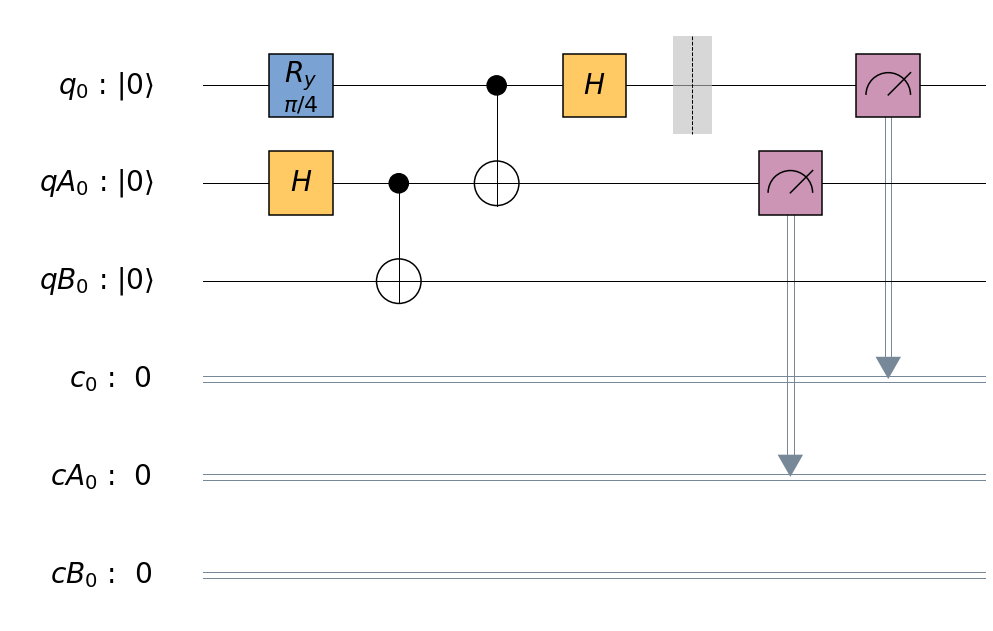

In [52]:
teleportation.add_register(c, cA, cB)

teleportation.cx(q, qA)
teleportation.h(q)
teleportation.barrier()

teleportation.measure(q, c)
teleportation.measure(qA, cA)

teleportation.draw(output='mpl', style=style)

# Alice sends Bob the two classical bits of information and<br>... Bob applies a quantum gate to $B$ conditional on those values.

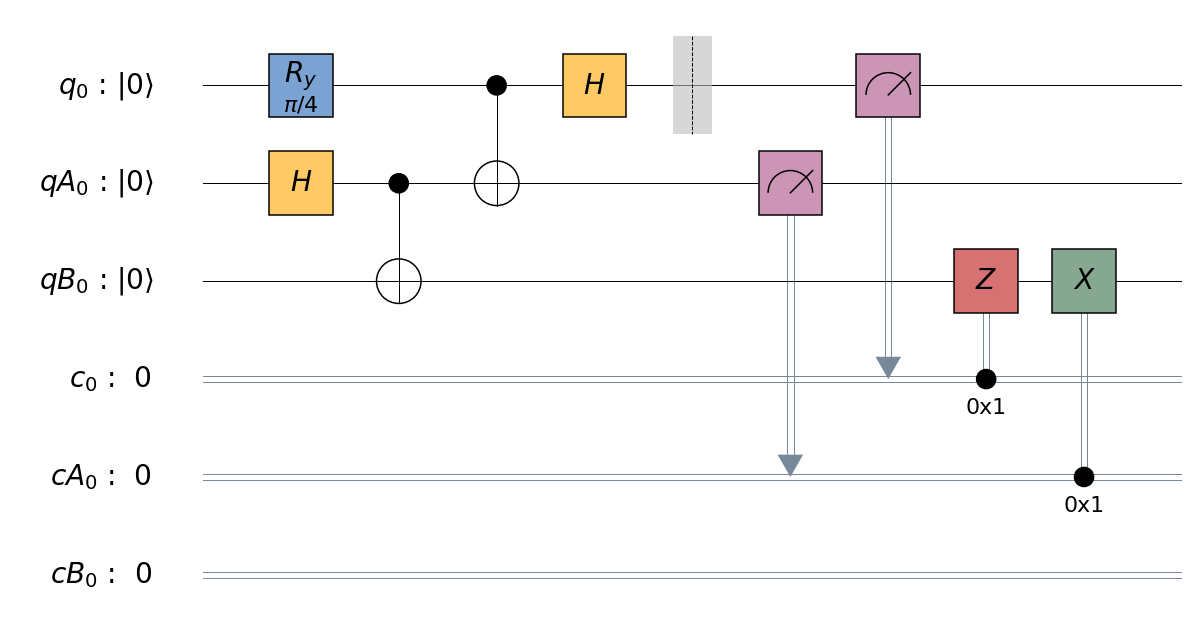

In [53]:
teleportation.z(qB).c_if(c, 1)
teleportation.x(qB).c_if(cA, 1)

teleportation.draw(output='mpl', style=style)

# Check if Alice successfully teleported the state of her qubit to Bob.

<!--
For Bob's qubit $B$ we expect to see measured probabilities corresponding to $|\alpha|^2 = |\cos(\frac{\pi}{8})|^2 \approx 0.854$ and $|\beta|^2 = |\sin(\frac{\pi}{8})|^2 \approx 0.146$.
-->

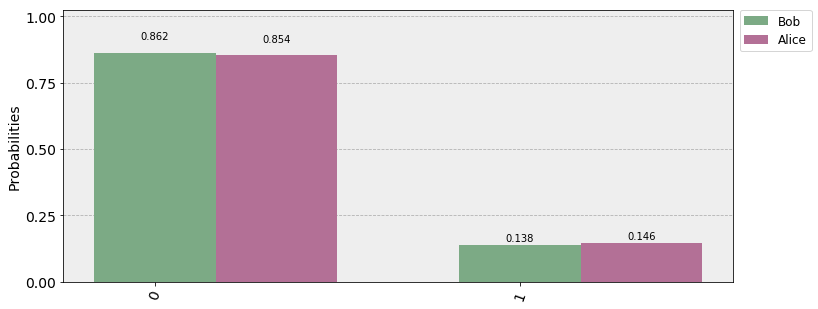

In [54]:
teleportation.measure(qB, cB)

job = execute(teleportation, backend, shots=1024) 
result = job.result()
counts = result.get_counts()

bob = {}
bob['0'] = counts['0 0 0'] + counts['0 1 0'] +  counts['0 0 1'] + counts['0 1 1'] # note the order of the classical bits
bob['1'] = counts['1 0 0'] + counts['1 1 0'] +  counts['1 0 1'] + counts['1 1 1']

plot_histogram([bob, alice], color=['#7caa85', '#b37096'], figsize=(12, 5), legend=['Bob','Alice'])

<img src="figs/go-forth.png" width="1500 px" align="center">


A tutorial version of this notebook is also available github at https://github.com/qiskit/qiskit-tutorial <br>Contributors: Anna Phan, Jay Gambetta, Takashi Imamichi.
